<a href="https://colab.research.google.com/github/Ioln/DataIoannis/blob/main/DataNBACourts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Creating Multiple ShotMaps for the NBA

In [1]:
pip install nba_api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 255 kB 5.1 MB/s 


After installing the api, let's import the teams and players

In [2]:
from nba_api.stats.static import players
player_dict = players.get_players()
from nba_api.stats.static import teams
teams = teams.get_teams()
from nba_api.stats.static import teams
teams = teams.get_teams()

from nba_api.stats.endpoints import shotchartdetail
from nba_api.stats.endpoints import playergamelog

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.patches import Circle, Rectangle, Arc, ConnectionPatch

Getting the details of the shots..

In [4]:
shot_detail = shotchartdetail.ShotChartDetail(player_id = '0',
              team_id= '1610612747', context_measure_simple = 'FGA',     
              season_type_all_star= 'Regular Season')

shot_df=shot_detail.get_data_frames()[0]

In [5]:
shot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   GRID_TYPE            280 non-null    object
 1   GAME_ID              280 non-null    object
 2   GAME_EVENT_ID        280 non-null    int64 
 3   PLAYER_ID            280 non-null    int64 
 4   PLAYER_NAME          280 non-null    object
 5   TEAM_ID              280 non-null    int64 
 6   TEAM_NAME            280 non-null    object
 7   PERIOD               280 non-null    int64 
 8   MINUTES_REMAINING    280 non-null    int64 
 9   SECONDS_REMAINING    280 non-null    int64 
 10  EVENT_TYPE           280 non-null    object
 11  ACTION_TYPE          280 non-null    object
 12  SHOT_TYPE            280 non-null    object
 13  SHOT_ZONE_BASIC      280 non-null    object
 14  SHOT_ZONE_AREA       280 non-null    object
 15  SHOT_ZONE_RANGE      280 non-null    object
 16  SHOT_DIS

In [6]:
shot = shot_df.groupby(by=['SHOT_ZONE_RANGE'])['SHOT_ZONE_AREA'].value_counts()

Our team is the Los Angeles Lakers, let's now see how many shots the LAKERS threw in a given area.

In [7]:
shot

SHOT_ZONE_RANGE  SHOT_ZONE_AREA       
16-24 ft.        Left Side Center(LC)       5
                 Center(C)                  4
                 Left Side(L)               3
                 Right Side Center(RC)      2
                 Right Side(R)              2
24+ ft.          Left Side Center(LC)      36
                 Center(C)                 30
                 Right Side Center(RC)     22
                 Left Side(L)              15
                 Right Side(R)             14
8-16 ft.         Center(C)                 10
                 Left Side(L)               4
                 Right Side(R)              2
Back Court Shot  Back Court(BC)             1
Less Than 8 ft.  Center(C)                130
Name: SHOT_ZONE_AREA, dtype: int64

In [8]:
shot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   GRID_TYPE            280 non-null    object
 1   GAME_ID              280 non-null    object
 2   GAME_EVENT_ID        280 non-null    int64 
 3   PLAYER_ID            280 non-null    int64 
 4   PLAYER_NAME          280 non-null    object
 5   TEAM_ID              280 non-null    int64 
 6   TEAM_NAME            280 non-null    object
 7   PERIOD               280 non-null    int64 
 8   MINUTES_REMAINING    280 non-null    int64 
 9   SECONDS_REMAINING    280 non-null    int64 
 10  EVENT_TYPE           280 non-null    object
 11  ACTION_TYPE          280 non-null    object
 12  SHOT_TYPE            280 non-null    object
 13  SHOT_ZONE_BASIC      280 non-null    object
 14  SHOT_ZONE_AREA       280 non-null    object
 15  SHOT_ZONE_RANGE      280 non-null    object
 16  SHOT_DIS

In [9]:
import numpy as np
from scipy.stats import binned_statistic_2d
import seaborn as sns
from bokeh.plotting import figure
from math import pi
%matplotlib inline

In [10]:
import urllib
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc

Shots..

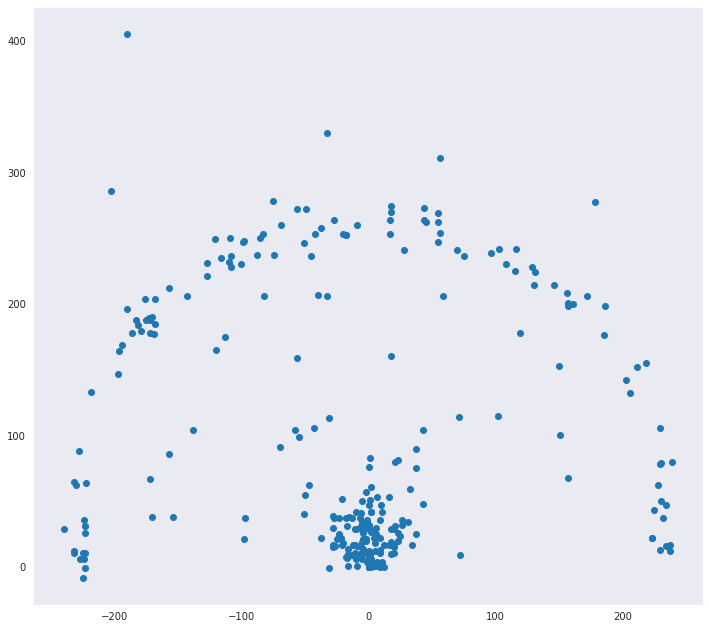

In [11]:
sns.set_style("dark")
sns.set_color_codes()
plt.figure(figsize=(12,11))
plt.scatter(shot_df.LOC_X, shot_df.LOC_Y)
plt.show()

Shots in a specific area.

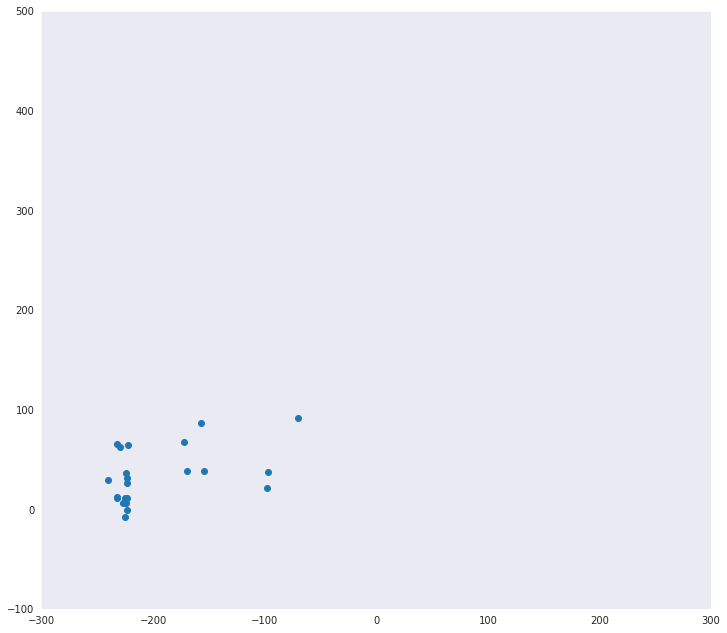

In [12]:
right = shot_df[shot_df.SHOT_ZONE_AREA == 'Left Side(L)']
plt.figure(figsize=(12,11))
plt.scatter(right.LOC_X, right.LOC_Y)
plt.xlim(-300, 300)
plt.ylim(-100,500)
plt.show()

Draw The Court.

In [13]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    """ (None) -> None

    Draw a basketball court on an matplotlib figure.
    """
    
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()
        
    # Create the various parts of an NBA basketball court
    
    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system (9in / 12ft = .75; .75*10ft = 7.5ft)
    hoop = plt.Circle((0,0), radius=7.5, linewidth=lw, color=color, fill=False)
    
    # Create backboard
    backboard = plt.Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)
    
# The paint
    # Create the outer box of the paint (width=16ft, height=19ft)
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color, fill=False)

    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color, fill=False)
    
    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)
    
# Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    
    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]
    
    
    if outer_lines:
        # Draw the half court line, baseline, and side outbound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw, color=color, fill=False)
        court_elements.append(outer_lines)
        
    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)
    
    return ax

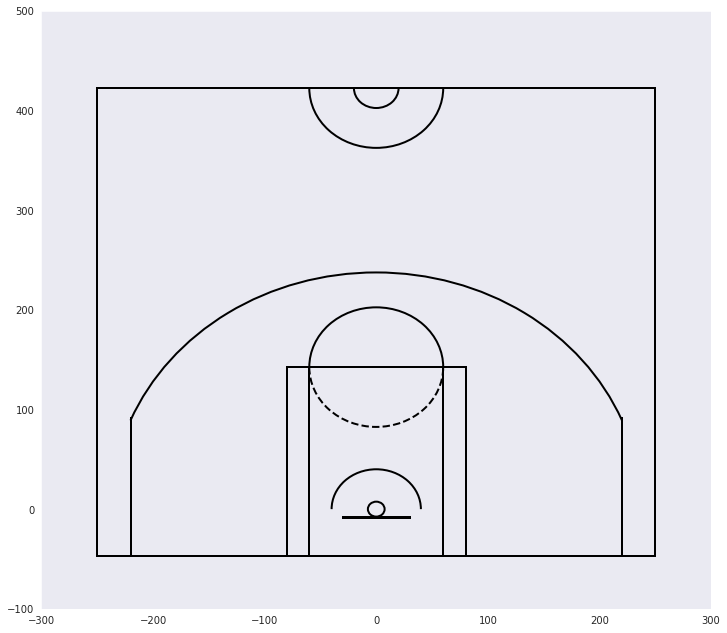

In [14]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

combine scatterplot and court

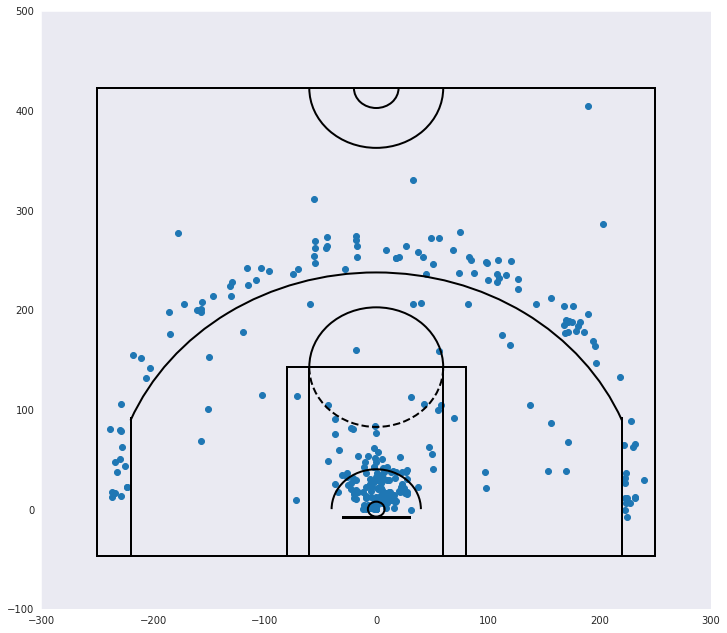

In [15]:

plt.figure(figsize=(12,11))
plt.scatter(-shot_df.LOC_X, shot_df.LOC_Y)
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

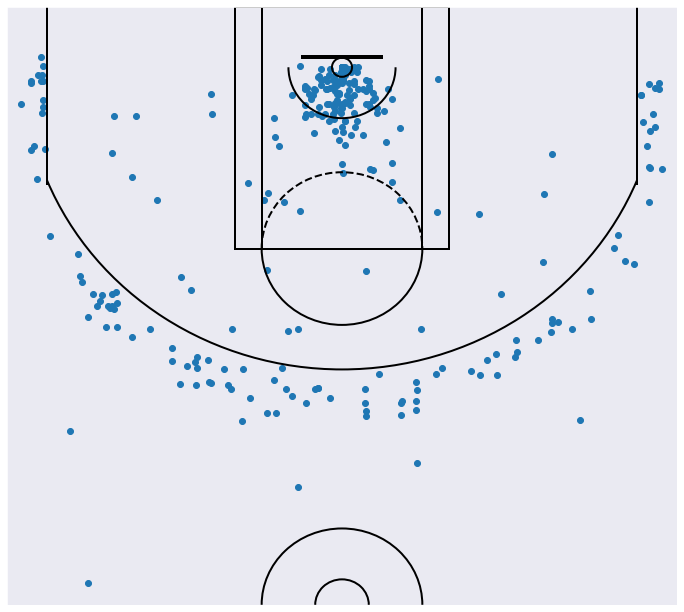

In [16]:

plt.figure(figsize=(12,11))
plt.scatter(shot_df.LOC_X, shot_df.LOC_Y)
draw_court()
# Adjust plot limits to fit only half court
plt.xlim(-250,250)
# Descending values along the y axis from bottom to top
# in order to place the hoop by the top of plot
plt.ylim(422.5,-47.5)
# Get rid of axis tick labels
plt.tick_params(labelbottom=False, labelleft=False)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2203: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): rug.
  warnings.warn(msg, UserWarning)


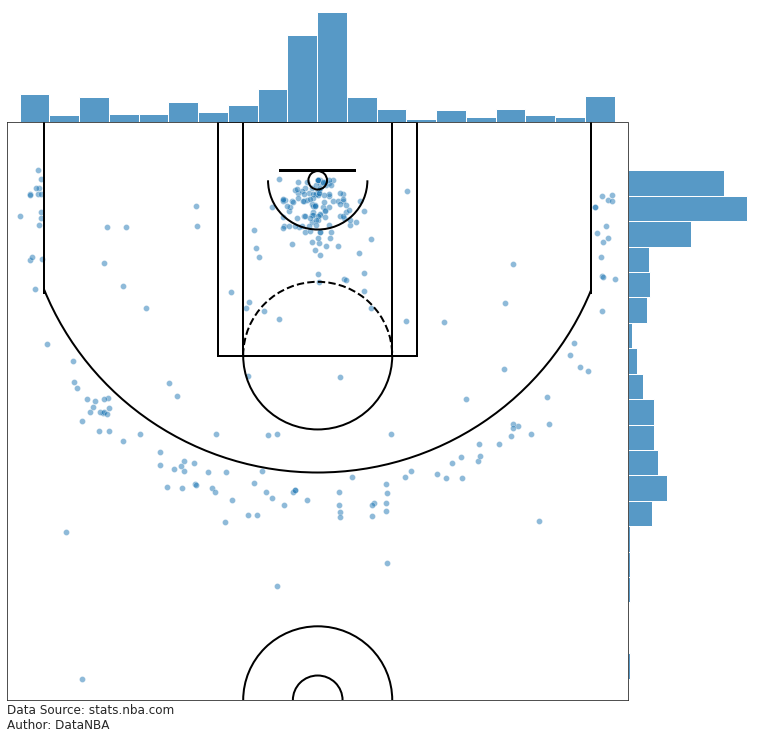

In [ ]:
joint_shot_chart = sns.jointplot(shot_df.LOC_X, shot_df.LOC_Y,
                                kind='scatter', space=0, alpha=0.5, marginal_kws=dict(bins=20, rug=False))

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250, 250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom=False, labelleft=False)

# Add a title
ax.set_title('Los Angeles Lakers Reg. Season',
            y=1.2, fontsize=18)

# Add data source and author
ax.text(-250,445,'Data Source: stats.nba.com'
       '\nAuthor: DataNBA', fontsize=12)

plt.show()

Getting a logo

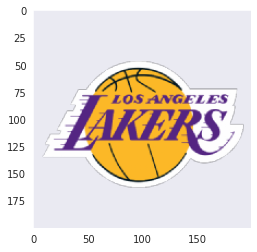

In [24]:
import urllib.request
# Pass in the link to the image as the first argument
# The 2nd argument tells urlretrieve what we want to scrape
pic = urllib.request.urlretrieve("https://a.espncdn.com/combiner/i?img=/i/teamlogos/nba/500/lal.png&h=200&w=200","LAL.png")

# urlretrieve returns a tuple with our image as the first element and imread
# reads in the image as a multidimensional numpy array so matplotlib can plot it
Lal_pic = plt.imread(pic[0])

# Plot the image
plt.imshow(Lal_pic)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


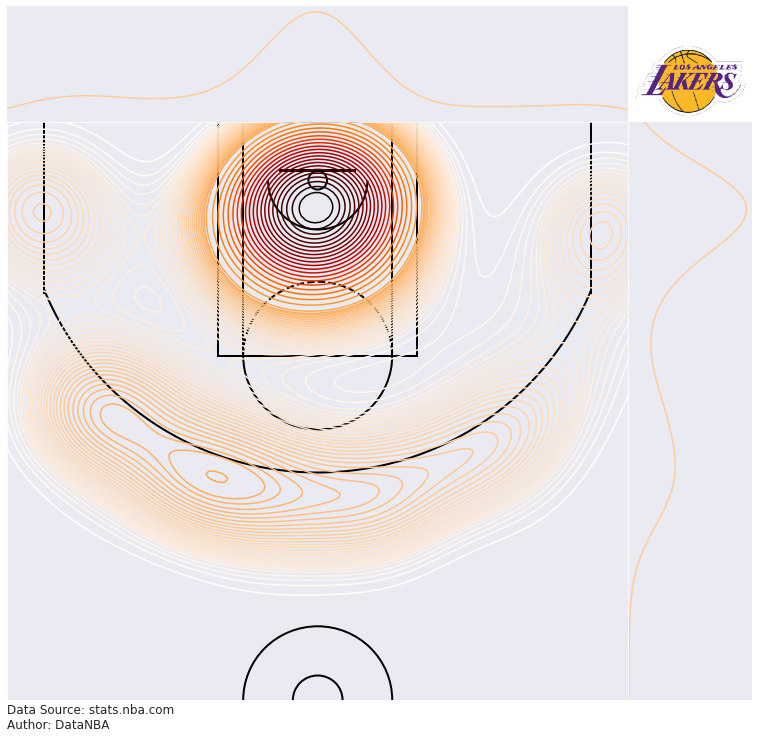

In [30]:
from matplotlib.offsetbox import OffsetImage

# Create jointplot

# get colormap for the main kde plot
# Note we can extract a color from cmap to use for
# the plots that lie on the side and top axes
cmap = plt.cm.gist_heat_r

# n_levels sets the number of contour lines for the main kde plot
joint_shot_chart = sns.jointplot(shot_df.LOC_X, shot_df.LOC_Y, kind='kde',
                                space=0, color=cmap(0.1),
                                cmap=cmap, n_levels=50)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250, 250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom=False, labelleft=False)

# Add a title
ax.set_title('Los Angeles Lakers 2021-2022 Reg. Season',
            y=1.2, fontsize=18)

# Add data source and author
ax.text(-250,445,'Data Source: stats.nba.com'
       '\nAuthor: DataNBA', fontsize=12)

# Add LAL's image to the top right
# First create OffsetImage by passing the image and set the zoom level
# to make the image small enough to fit on our plot
img = OffsetImage(Lal_pic, zoom=0.6)

# Pass in a tuple of x,y coordinates to set_offset to place the plot
# somewhere, play around with the values until you find a spot
# where you want the image to be
img.set_offset((630,600))

# Add the image
ax.add_artist(img)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


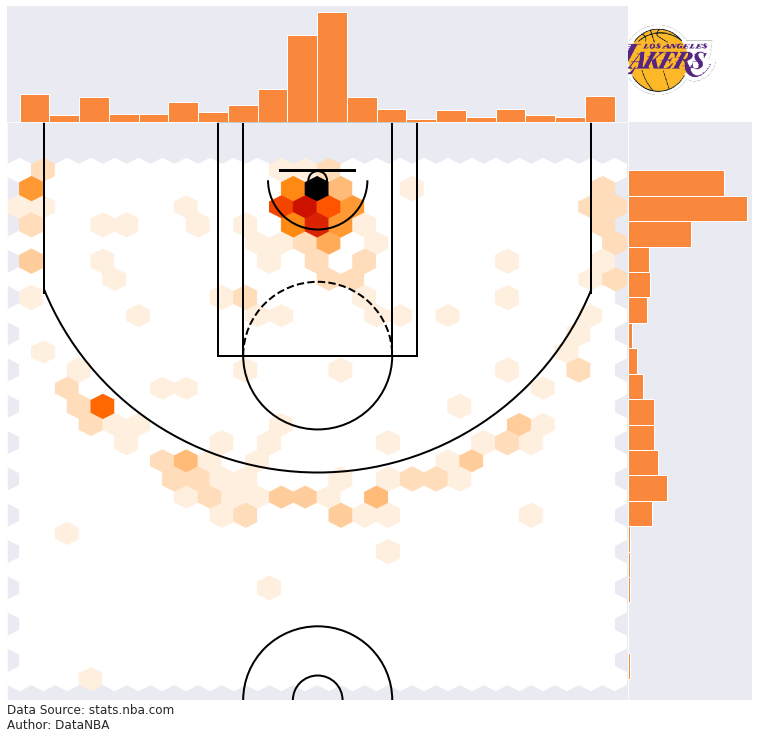

In [31]:
from matplotlib.offsetbox import OffsetImage

# Create jointplot

# Set colormap
cmap = plt.cm.gist_heat_r

joint_shot_chart = sns.jointplot(shot_df.LOC_X, shot_df.LOC_Y, kind='hex',
                                space=0, color=cmap(0.3), cmap=cmap,
                                joint_kws=dict(gridsize=25), marginal_kws=dict(bins=20))

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250, 250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom=False, labelleft=False)

# Add a title
ax.set_title('Los Angeles Lakers 22-23',
            y=1.2, fontsize=18)

# Add data source and author
ax.text(-250,445,'Data Source: stats.nba.com'
       '\nAuthor: DataNBA', fontsize=12)

# Add LAL's image to the top right
img = OffsetImage(Lal_pic, zoom=0.6)
img.set_offset((600,621))
ax.add_artist(img)

plt.show()

In [32]:
import pandas as pd
import numpy as np

from scipy.stats import norm, gaussian_kde, percentileofscore

pd.options.display.max_columns = None
from nba_api.stats.static import players
from nba_api.stats.endpoints import shotchartdetail
from nba_api.stats.endpoints import playercareerstats

# For Shot Chart
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import cm
from matplotlib.patches import Circle, Rectangle, Arc, ConnectionPatch
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import LinearSegmentedColormap, ListedColormap, BoundaryNorm
from matplotlib.path import Path
from matplotlib.patches import PathPatch

sns.set_style('white')
sns.set_color_codes()

Now let's see that of a player

In [33]:
def get_player_shotchartdetail(player_name, season_id):
    player_name: 'Keldon Johnson'
    season_id: '22022'
   
   
    
    # player dictionary
    nba_players = players.get_players()
    player_dict = [player for player in nba_players if player['full_name'] == player_name][0]
    
    # career df
    career = playercareerstats.PlayerCareerStats(player_id=player_dict['id'])
    career_df = career.get_data_frames()[0]
    
    # team id during the season
    team_id = career_df[career_df['SEASON_ID'] == season_id]['TEAM_ID']
    
    # shotchardtdetail endpoint
    shotchartlist = shotchartdetail.ShotChartDetail(team_id=int(team_id), 
                                                   player_id=int(player_dict['id']),                                                
                                                   season_type_all_star='Regular Season', 
                                                   season_nullable=season_id,
                                                   context_measure_simple="FGA").get_data_frames()
    
    return shotchartlist[0], shotchartlist[1]

In [34]:
player_shotchart_df, league_avg = get_player_shotchartdetail('Keldon Johnson','2022-23')
player_shotchart_df

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0022200011,15,1629640,Keldon Johnson,1610612759,San Antonio Spurs,1,10,33,Made Shot,Pullup Jump shot,2PT Field Goal,Mid-Range,Left Side(L),8-16 ft.,10,-85,69,1,1,20221019,SAS,CHA
1,Shot Chart Detail,0022200011,24,1629640,Keldon Johnson,1610612759,San Antonio Spurs,1,9,53,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,26,-174,197,1,0,20221019,SAS,CHA
2,Shot Chart Detail,0022200011,53,1629640,Keldon Johnson,1610612759,San Antonio Spurs,1,8,12,Missed Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,3,-31,-3,1,0,20221019,SAS,CHA
3,Shot Chart Detail,0022200011,69,1629640,Keldon Johnson,1610612759,San Antonio Spurs,1,6,47,Made Shot,Driving Dunk Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,4,5,1,1,20221019,SAS,CHA
4,Shot Chart Detail,0022200011,95,1629640,Keldon Johnson,1610612759,San Antonio Spurs,1,4,38,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,25,25,256,1,0,20221019,SAS,CHA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Shot Chart Detail,0022200050,595,1629640,Keldon Johnson,1610612759,San Antonio Spurs,4,7,13,Missed Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,-18,19,1,0,20221024,MIN,SAS
65,Shot Chart Detail,0022200050,600,1629640,Keldon Johnson,1610612759,San Antonio Spurs,4,6,40,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,25,-58,247,1,0,20221024,MIN,SAS
66,Shot Chart Detail,0022200050,616,1629640,Keldon Johnson,1610612759,San Antonio Spurs,4,5,48,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,24,212,121,1,1,20221024,MIN,SAS
67,Shot Chart Detail,0022200050,625,1629640,Keldon Johnson,1610612759,San Antonio Spurs,4,4,55,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,25,150,203,1,0,20221024,MIN,SAS


In [35]:
player_shotchart_df['LOC_X'].isnull().any().any()

False

Avg the league in the areas and range

In [ ]:
league_avg

,GRID_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,FGA,FGM,FG_PCT
0,League Averages,Above the Break 3,Back Court(BC),Back Court Shot,4,0,0.000
1,League Averages,Above the Break 3,Center(C),24+ ft.,592,201,0.340
2,League Averages,Above the Break 3,Left Side Center(LC),24+ ft.,882,308,0.349
3,League Averages,Above the Break 3,Right Side Center(RC),24+ ft.,746,268,0.359
4,League Averages,Backcourt,Back Court(BC),Back Court Shot,16,0,0.000
5,League Averages,In The Paint (Non-RA),Center(C),Less Than 8 ft.,766,309,0.403
6,League Averages,In The Paint (Non-RA),Center(C),8-16 ft.,462,192,0.416
7,League Averages,In The Paint (Non-RA),Left Side(L),8-16 ft.,67,31,0.463
8,League Averages,In The Paint (Non-RA),Right Side(R),8-16 ft.,91,39,0.429
9,League Averages,Left Corner 3,Left Side(L),24+ ft.,357,145,0.406


In [36]:
def draw_court(ax=None, color="blue", lw=1, shotzone=False, outer_lines=False):
    """Returns an axes with a basketball court drawn onto to it.
    This function draws a court based on the x and y-axis values that the NBA
    stats API provides for the shot chart data.  For example the center of the
    hoop is located at the (0,0) coordinate.  Twenty-two feet from the left of
    the center of the hoop in is represented by the (-220,0) coordinates.
    So one foot equals +/-10 units on the x and y-axis.
    Parameters
    ----------
    ax : Axes, optional
        The Axes object to plot the court onto.
    color : matplotlib color, optional
        The color of the court lines.
    lw : float, optional
        The linewidth the of the court lines.
    outer_lines : boolean, optional
        If `True` it draws the out of bound lines in same style as the rest of
        the court.
    Returns
    -------
    ax : Axes
        The Axes object with the court on it.
    """
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -12.5), 60, 0, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the right side 3pt lines, it's 14ft long before it arcs
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    # Create the right side 3pt lines, it's 14ft long before it arcs
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    
    # Draw shotzone Lines
    # Based on Advanced Zone Mode
    if (shotzone == True):
        inner_circle = Circle((0, 0), radius=80, linewidth=lw, color='black', fill=False)
        outer_circle = Circle((0, 0), radius=160, linewidth=lw, color='black', fill=False)
        corner_three_a_x =  Rectangle((-250, 92.5), 30, 0, linewidth=lw, color=color)
        corner_three_b_x = Rectangle((220, 92.5), 30, 0, linewidth=lw, color=color)
        
        # 60 degrees
        inner_line_1 = Rectangle((40, 69.28), 80, 0, 60, linewidth=lw, color=color)
        # 120 degrees
        inner_line_2 = Rectangle((-40, 69.28), 80, 0, 120, linewidth=lw, color=color)
        
        # Assume x distance is also 40 for the endpoint
        inner_line_3 = Rectangle((53.20, 150.89), 290, 0, 70.53, linewidth=lw, color=color)
        inner_line_4 = Rectangle((-53.20, 150.89), 290, 0, 109.47, linewidth=lw, color=color)
        
        # Assume y distance is also 92.5 for the endpoint
        inner_line_5 = Rectangle((130.54, 92.5), 80, 0, 35.32, linewidth=lw, color=color)
        inner_line_6 = Rectangle((-130.54, 92.5), 80, 0, 144.68, linewidth=lw, color=color)
        
        
        # List of the court elements to be plotted onto the axes
        court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                          bottom_free_throw, restricted, corner_three_a,
                          corner_three_b, three_arc, center_outer_arc,
                          center_inner_arc, inner_circle, outer_circle,
                          corner_three_a_x, corner_three_b_x,
                          inner_line_1, inner_line_2, inner_line_3, inner_line_4, inner_line_5, inner_line_6]
    else:
        # List of the court elements to be plotted onto the axes
        court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                          bottom_free_throw, restricted, corner_three_a,
                          corner_three_b, three_arc, center_outer_arc,
                          center_inner_arc]
    
    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)
        

    return ax

In [37]:
def shot_chart(data, title="", color="b",
               xlim=(-250, 250), ylim=(422.5, -47.5), line_color="blue",
               court_color="white", court_lw=2, outer_lines=False,
               flip_court=False, gridsize=None, 
               ax=None, despine=False, **kwargs):

    if ax is None:
        ax = plt.gca()

    if not flip_court:
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
    else:
        ax.set_xlim(xlim[::-1])
        ax.set_ylim(ylim[::-1])

    ax.tick_params(labelbottom="off", labelleft="off")
    ax.set_title(title, fontsize=18)

    # draws the court
    draw_court(ax, color=line_color, lw=court_lw, outer_lines=outer_lines)

    # separate color by make or miss    
    x_missed = data[data['EVENT_TYPE'] == 'Missed Shot']['LOC_X']
    y_missed = data[data['EVENT_TYPE'] == 'Missed Shot']['LOC_Y']

    x_made = data[data['EVENT_TYPE'] == 'Made Shot']['LOC_X']
    y_made = data[data['EVENT_TYPE'] == 'Made Shot']['LOC_Y']

    # plot missed shots
    ax.scatter(x_missed, y_missed, c='r', marker="x", s=300, linewidths=3, **kwargs)
    # plot made shots
    ax.scatter(x_made, y_made, facecolors='none', edgecolors='g', marker="o", s=100, linewidths=3, **kwargs)
        
    # Set the spines to match the rest of court lines, makes outer_lines
    # somewhate unnecessary
    for spine in ax.spines:
        ax.spines[spine].set_lw(court_lw)
        ax.spines[spine].set_color(line_color)

    if despine:
        ax.spines["top"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)

    return ax

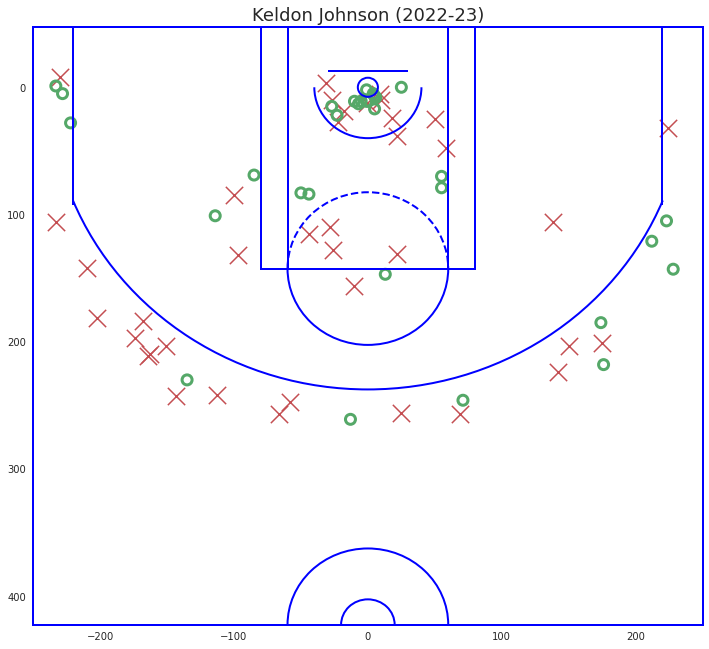

FG%:  0.449 (31-69)


In [39]:
plt.rcParams['figure.figsize'] = (12, 11)
shot_chart(player_shotchart_df, title="Keldon Johnson (2022-23)")
plt.show()
print("FG%: ", "{0:.3f}".format(player_shotchart_df['SHOT_MADE_FLAG'].sum()/len(player_shotchart_df)), "({0}-{1})".format(player_shotchart_df['SHOT_MADE_FLAG'].sum(),len(player_shotchart_df)))